# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** When I run the default `agent.py` code, the Smartcab remains stationary in the position where it spawns. Since it spawns at an intersection and just stays there, it is receiving rewards at each update step based on the color of the stoplight it is waiting at. When the light is red, the smartcab receives a positive reward because the car is properly waiting at the intersection. When the light is green, and there is oncoming traffic moving into the area which would make it dangerous for the Smartcab to pull out, then again the agent receives a positive reward for waiting, as it should. But when the light is green and it is safe to move, the agent receives a negative reward because it still doesn't move. Therefore, the reward is changing from positive to negative in semi-random, unpredictable ways, because the light changes colors and the other cars move around in the environment, but the Smartcab stays in the same place throughout each trial.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:** 
* For my three flags, I choose **num_dummies** (which sets the number of other cars on the map); **grid_size**, which sets the number of intersections in the environment, and therefore the overall size of the map; and **n_tests** which sets the number of tests to be performed once the epsilon has decayed below the threshold.
* When an agent performs an action, it calls the **act()** method of the Environment class.
* The **render()** function renders the simulation environment graphically in the PyGame GUI, whereas the **render_text()** function renders the simulation environment but then prints a description to the console instead of displaying it graphically.
* The **next_waypoint()** function will consider the East-West direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


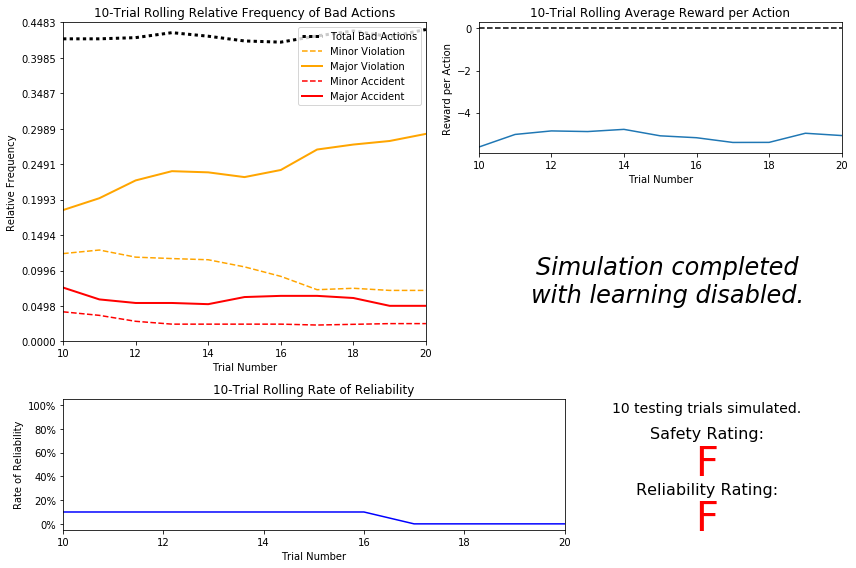

In [9]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
* According to the **Relative Frequency vs Trial Number** graph in the top left, the agent is making bad actions at a frequency that hovers between 40 and 45%. Also, the agent's actions result in minor accidents about 6 to 7 % of the time, and major accidents about 5-7% of the time, so more than 10% of the time, the agent's actions result in some type of accident.
* We haven't been told about **rate of reliability** as a measure yet (only the letter grade of reliability), but if it describes the number of times the Smartcab makes an appropriate "correct" action in comparison with the number of decisions made in total, then the very low rate in our 10-Trial Rolling Rate of Reliability makes sense. It only randomly selects the correct action about 10% of the time, if that.
* The average reward for the action hovers between the values of -6 and -5, suggesting that the agent is, in fact, being penalized heavily for its many incorrect actions.
* The outcome does not change significantly as the number of trials increases, and since there is no learning taking place, this stands to reason.
* No, it receives an F for both safety and reliability. Moreover, it would almost never reach the destination and it would crash frequently and break the law frequently.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:** The **waypoint** feature is important for finding a short path to the destination, and therefore is needed in order to learn *efficiency*; whereas the **inputs** in conjunction with **waypoint** are both important for detecting possible collisions, so these features are important for learning *safety*. The **deadline** feature, on the other hand, isn't really needed, and I am leaving it out of the state space. The amount of time until the simulation ends does not in any way inform the best path; the best path should be the same whether there are few or many rounds left on the simulation.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** The **waypoint** feature has 3 direction states (left, right, and forward). The **inputs** feature uses  four direction states (left, right, forward, and None) to describe the movement of three other agents, and also includes two states to describe the stoplight at the current intersection (red or green). With only these features, and not including the **deadline** feature, we have a state space containing 384 combinations. But the **deadline** feature is an integer between 0 and 5 times the manhattan distance between the initial SmartCab position and the destination, so this feature makes the state space many times larger. Given that you just said a state space of 1536 was too large in the previous paragraphs (the "is_raining..." state space has 1536 combinations assuming the *time_of_day* feature has 24 possible states), it stands to reason that this state space is way, way too large. This fact supports my conclusion that the deadline feature should be left out of the state space.

After further reflection (at the prompting of a reviewer) I realize that I can also remove one of the agents from the **inputs** feature. Since there is a light at every intersection, and since all the agents in the environment obey US driving laws, whenever the light is green there is no need to worry about cross-traffic since cars are only allowed to turn right on red, and then only if the lane is clear. Therefore, when the light is green, I do not have to worry about cars to the left or right, only cars that are oncoming. When the light is red, in the case that I want to turn right, I have to worry about the car to the left of me. But I still do not have to worry about any car to the right of me, as there is no way I can collide with that car when performing a right turn. Therefore, since there is never a case where I must worry about cars to the right of me, I can leave them out of the state space. Removing that agent from the inputs feature leaves me with a new state space having only 96 combinations.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

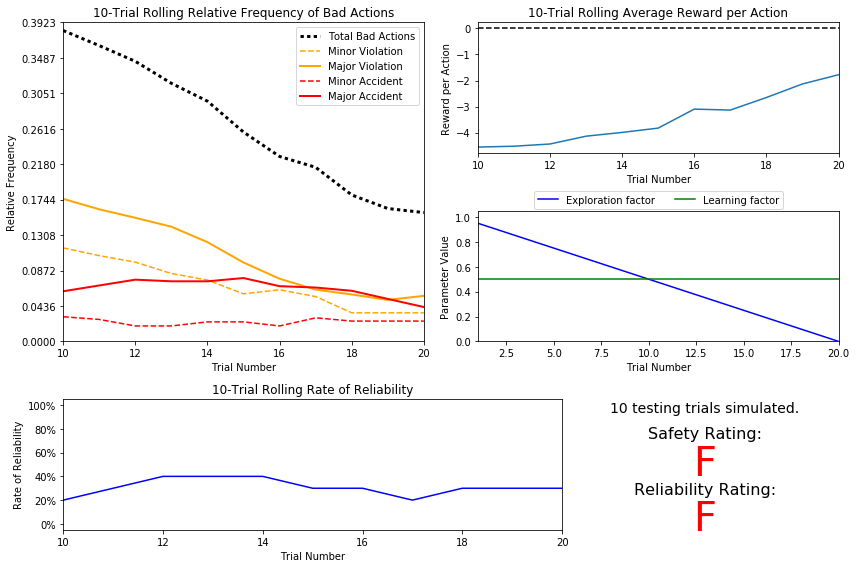

In [8]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:** 
* Although this agent is learning, and it improves upon the basic random driving agent, its overall reliability and safety are still bad. The number of minor accidents and major accidents do not appear to be significantly improved, although they may be starting to trend downwards by the end of the training sets. 
* The driving agent required 20 trials before testing, which makes sense given that we implemented the epsilon tolerance in such a way that, once it fell below 0.05, testing would begin. Since our epsilon decay function starts at 1 and decreases by .05 each trial, 20 training trials would take place before testing begins.
* The decaying function implemented for $\epsilon$ is shown by the blue line in the parameters panel. It is accurately represented, as the line is shown with a slope of -1/20 $\epsilon$ per trial.
* As the number of training trials went up, the number of bad actions went down. This was also reflected in the fact that: (1) the number of minor and major violations went down, and (2) the average reward per trial increased. If we had trained longer, we may have seen similar improvements start to appear in the number of minor and major accidents.
* Our rate of reliability graph shows significant improvement over the agent from question 3, and our frequency of bad actions and violations is significantly improved as well; however, with regard to safety and reliability, this agent is still not good enough. It gets a grade of F with regard to safety and reliability, same as the random driving agent. This is because it is not road-worthy: it only has about a 20% reliability rating, it caused accidents about 10% of the trials even after learning, and it violated the law on about 10% of the trials even after learning.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

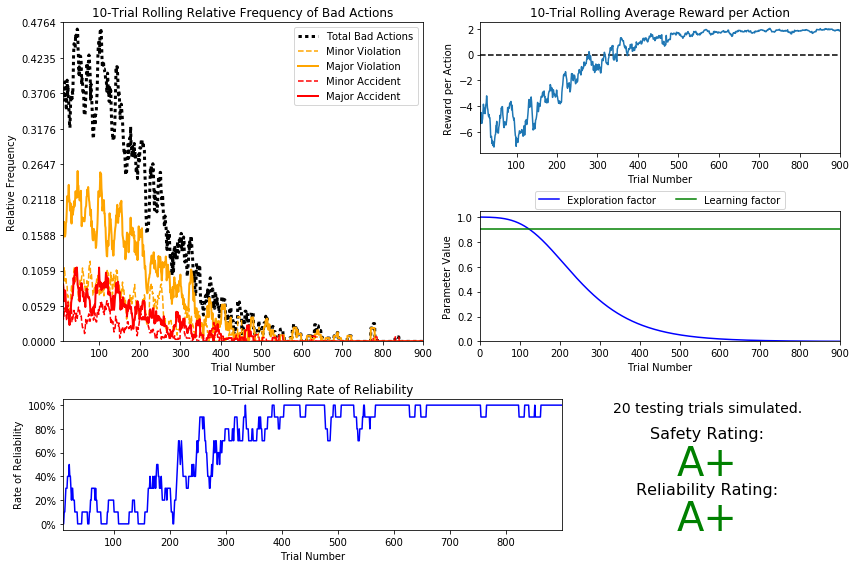

In [26]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:** 
* I tried all the example decaying functions for $\epsilon$, and I ended up using $\epsilon = e^{-.05t}$, because I liked the fact that I could tune this decay function's initial dropoff and decay by changing the value of the .05 constant. I tried using my alpha value in the place of the constant, but found I wanted to be able to change these values independently in order to experiment more. Then, after a reviewer's recommendation, I took a look at the Gompertz function and ended up using $\epsilon = 1 - e^{-8e^{-.01t}}$ because it gave me more control over the curve. Changing the -8 constant allows me to change how long the epsilon stays high in the beginning, and changing the .01 constant value allows me to control how steeply the epsilon drops off later on.
* In the case shown above, there were approximately 900 training trials. I found that, generally speaking, the more training trials, the better.
* I chose an epsilon tolerance of .001, because my epsilon decay function has the property that it approaches but never actually reaches zero, so by changing the value of the tolerance I could change the number of trials that were performed. I found that I would receive A or A+ grades for both safety and reliability if there were 800 or 900 trials, so I found a tolerance value and a decay curve that would give me that many trials. 
* For my alpha I tried various different constant values, ranging from .01 to .99. With this many trials, I found that the learning rate had very little impact on the outcome, and the agent ended up performing just as well no matter what the alpha was. I also tried a decaying alpha function in conjunction with the Gompertz function I am using for $\epsilon$, where I set $\alpha = e^{-.01t}$ and then used that in my Gompertz function like $\epsilon = 1 - e^{-8\alpha}$. This performed worse than any of the constant alpha functions I tried, so I went back to $\alpha = 0.9$.
* The improved Q-learner ends up with an average reliability rating that hovers around 100%, and near-zero incidence of bad actions, violations, or accidents. So, compared to my original Q-learner which had about a 20% reliability rating and frequencies of bad actions/violations/accidents at around 0.17/.15/.10, this optimized Q-learner is much improved. I would say that my results show that, while there may still be states which the Smartcab has not yet trained for, the Smartcab has clearly learned the correct policy in the vast majority of situations.
* The safety and reliability ratings of the Smartcab are largely a function of the **n_tests** flag. More tests tends to result in a lower rating. This is due to the fact that even one accident can bring an A+ to a D or an F. I believe this is an appropriate rating for any car that is actually going to go on the road. In my results, with 20 tests I am receiving an A+ safety rating and an A+ reliability rating. To me, this is a satisfactory result.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 
Some examples I though of are:
* When the light is red, only right turns are allowed, and then only if there is no oncoming traffic from the left.
* When the waypoint is forward, and there are cars to the right or left moving towards the agent, the correct action is, again, to idle. 
* When there is no car in the oncoming lane, and the light is green, the correct action is to go toward the waypoint.

After inspecting the sim_improve-learning.txt file, I discuss a few cases below. My state space is laid out in the following order: **(*waypoint, light, oncoming, left*)**

* **('right', 'red', None, 'left')** gives *forward : -10.14, None : 0.64, right : 2.69, left : -11.89*

Here the light is red, but a right turn is safe and legal since the car to the left is making a turn instead of staying in its current lane. Since there can be no collision if the Smartcab makes a right turn, the action with max Q is correct, and fits my first statement above.

* **('left', 'green', None, 'left')** gives *forward : 0.25, None : -4.27, right : 0.44, left : 1.10*

In my Q-table, in all cases where the light is green and there is no traffic in the oncoming lane, the action with max Q is the same as the waypoint. This would lead to the correct policy as per my third statement above. In this case, we see that the car to the left of the Smartcab wants to make a left turn across traffic. This does not impact the correct action, because that car must wait for the light to change colors before it can go.

* **('forward', 'green', 'left', 'right')** gives *forward : 2.21, None : 0.14, right : 1.03, left : 0.57*

Here we see that the action with max Q is to go forward toward the waypoint, even though the car in the oncoming lane wants to make a left turn across our lane of traffic. This makes sense given US traffic laws, where cars that are turning left must wait for oncoming traffic to clear first. So this leads to the correct policy. On the other hand:

* **('left', 'green', 'forward', 'left')** gives *forward : 0.21, None : 0.00, right : 0.01, left : -19.03*

Here we have a case that is somewhat opposite of the last one. The Smartcab wants to turn left, but needs to wait for the oncoming traffic to proceed through the intersection first, in order to avoid an accident. What is interesting is that in this case the action with max Q is to go forward rather than to wait. One would think that the best action is to simply idle and turn when the oncoming traffic has cleared, but it is true that in many cases—depending on the relative location of the destination—going forward instead of waiting to turn left is actually the better choice, getting the Smartcab to the destination quicker. Since future rewards are not factored into this algorithm, however, this particular state is probably just exhibiting some error. If the algorithm were trained longer, the None action might end up with the max Q.


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:** 
* With each new trial, the destination is different. So integrating the future reward into the Q values will cause problems because the resulting policy will tend to direct the Smartcab to destinations that are no longer valid.
* The Smartcab can only see the environment's state at the current intersection. Each round, that state can change in a variety of ways—the Smartcab could move to a new intersection, the light could change, new cars could pull up to the intersection, and so forth—since the future reward is based on knowing the next state the Smartcab will be in after it takes an action, and there is no way to be certain what state the Smartcab will be in with this changing environment, future rewards are likely to be calculated incorrectly.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.